In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DS2=pd.read_csv("train.csv")
DS2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
DS2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Shape of the dataset:", DS2.shape)

Shape of the dataset: (891, 12)


In [6]:
print("\nData types:\n", DS2.dtypes)


Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
print("\nSummary statistics:\n", DS2.describe(include='all'))


Summary statistics:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parc

In [8]:
print("\nMissing values:\n", DS2.isnull().sum())


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
import warnings
warnings.filterwarnings('ignore')
DS2 = DS2.dropna(subset=['Survived', 'Pclass', 'Sex', 'Embarked'])
DS2['Age'].fillna(DS2['Age'].median(), inplace=True)
DS2['Fare'].fillna(DS2['Fare'].median(), inplace=True)
DS2['Cabin'].fillna('Unknown', inplace=True)
DS2 = DS2.drop_duplicates()
DS2['Survived'] = DS2['Survived'].astype('category')
DS2['Pclass'] = DS2['Pclass'].astype('category')
DS2['Sex'] = DS2['Sex'].astype('category')
DS2['Embarked'] = DS2['Embarked'].astype('category')
print("\nMissing values after handling:\n", DS2.isnull().sum())


Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


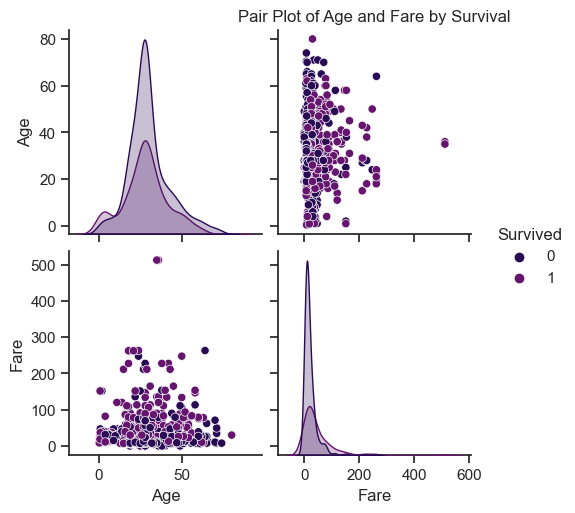

In [10]:
print(DS2.columns)
DS2.dropna(subset=['Age', 'Fare', 'Survived'], inplace=True)
sns.set(style="ticks", palette="inferno")
sns.pairplot(DS2, vars=['Age', 'Fare'], hue='Survived')
plt.title('Pair Plot of Age and Fare by Survival')
plt.show()

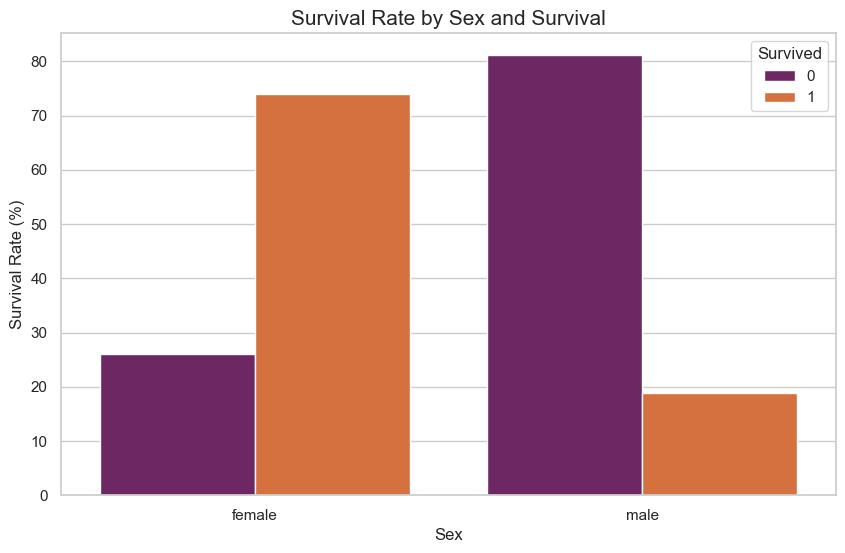

In [11]:
survival_counts = DS2.groupby(['Sex', 'Survived']).size()
survival_total = DS2.groupby('Sex').size()
survival_rate = (survival_counts / survival_total) * 100
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(x=survival_rate.index.get_level_values('Sex'), y=survival_rate.values, hue=survival_rate.index.get_level_values('Survived'), palette='inferno')
plt.title('Survival Rate by Sex and Survival', fontsize=15)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.show()

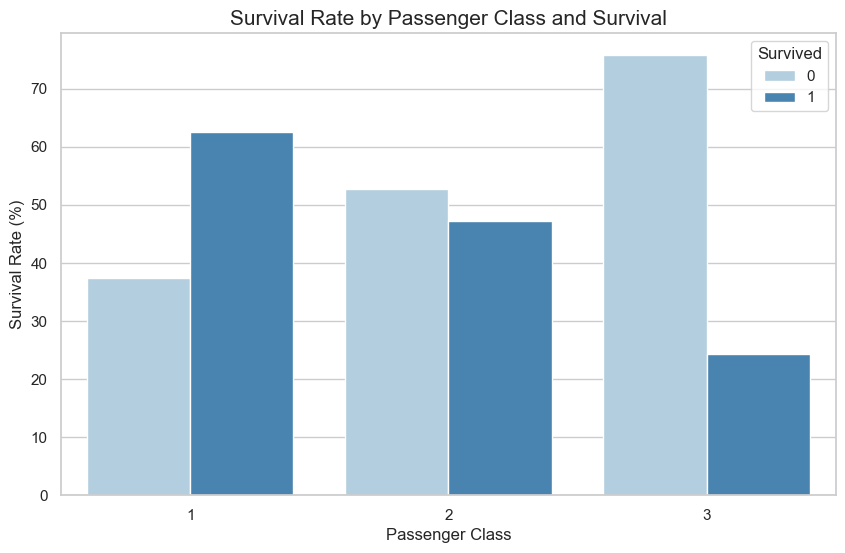

In [12]:
survival_counts = DS2.groupby(['Pclass', 'Survived']).size()
survival_total = DS2.groupby('Pclass').size()
survival_rate = (survival_counts / survival_total) * 100
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(x=survival_rate.index.get_level_values('Pclass'), y=survival_rate.values, hue=survival_rate.index.get_level_values('Survived'), palette='Blues')
plt.title('Survival Rate by Passenger Class and Survival', fontsize=15)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.show()

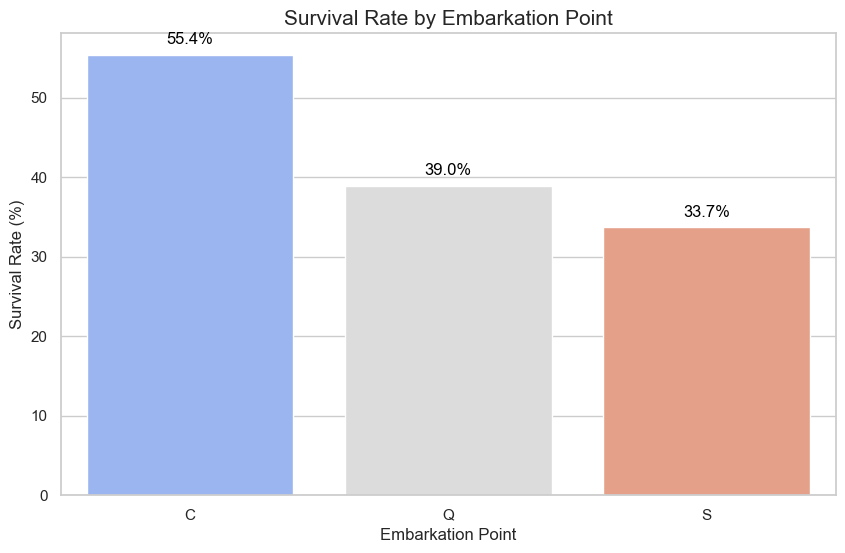

In [13]:
DS2['Survived'] = DS2['Survived'].astype(int)
survival_rate = DS2.groupby('Embarked')['Survived'].mean() * 100
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='coolwarm')
for i, rate in enumerate(survival_rate):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center', va='bottom', fontsize=12, color='black')
plt.title('Survival Rate by Embarkation Point', fontsize=15)
plt.xlabel('Embarkation Point', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.show()

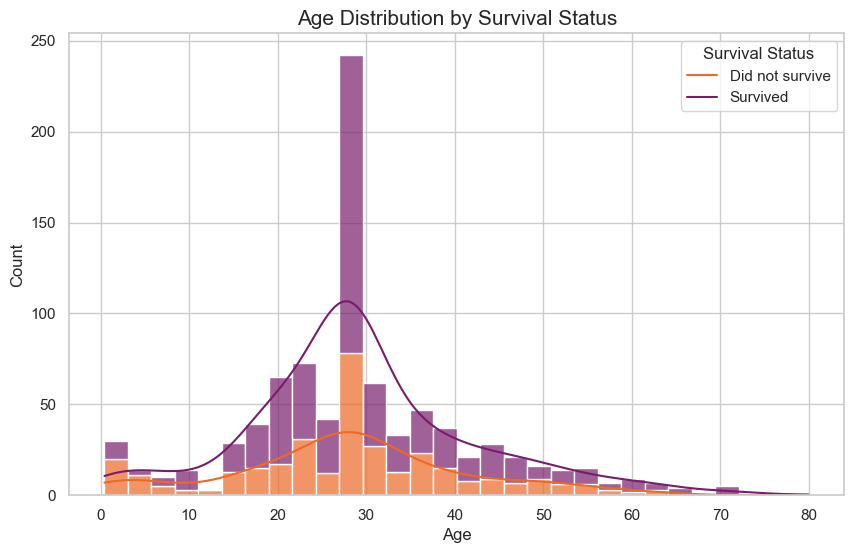

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=DS2, x='Age', hue='Survived', multiple='stack', kde=True, palette='inferno', alpha=0.7)
plt.title('Age Distribution by Survival Status', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(labels=['Did not survive', 'Survived'], title='Survival Status')
plt.show()

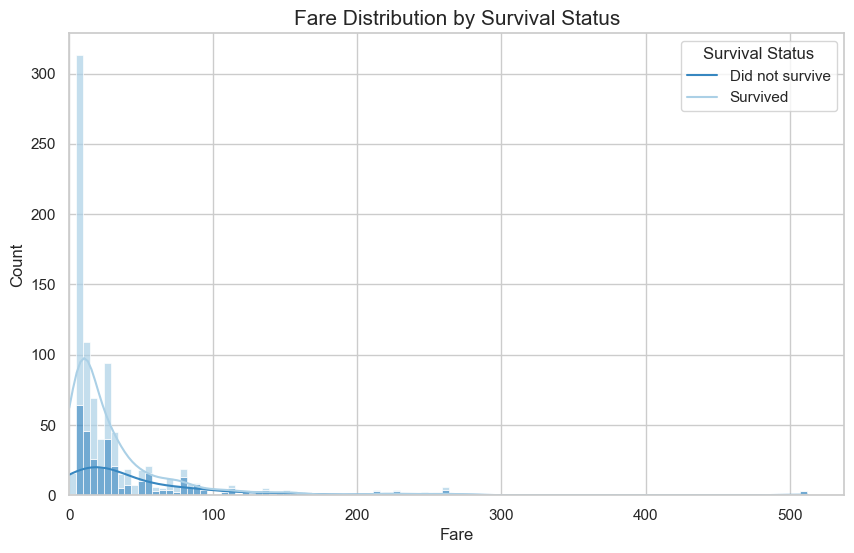

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=DS2, x='Fare', hue='Survived', multiple='stack', kde=True, palette='Blues', alpha=0.7)
plt.title('Fare Distribution by Survival Status', fontsize=15)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(labels=['Did not survive', 'Survived'], title='Survival Status')
plt.xlim(0, None)
plt.show()

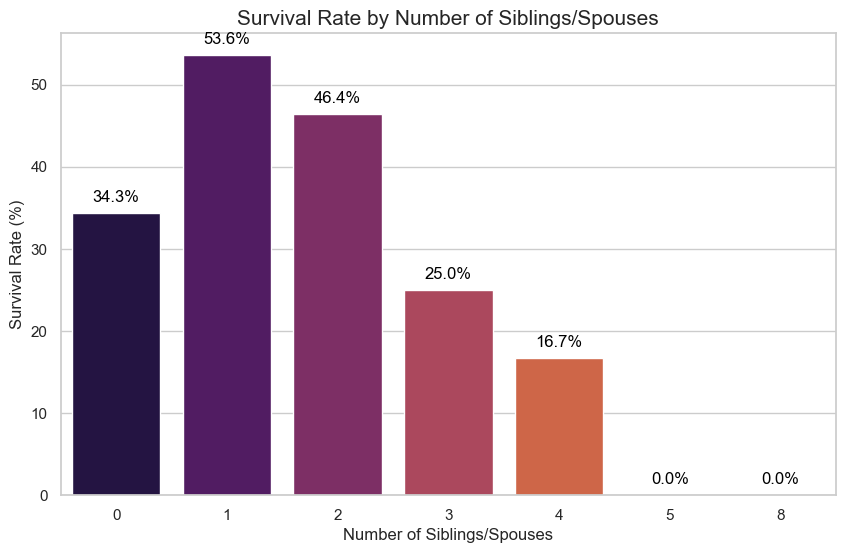

In [16]:
survival_rate = DS2.groupby('SibSp')['Survived'].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='inferno')
plt.title('Survival Rate by Number of Siblings/Spouses', fontsize=15)
plt.xlabel('Number of Siblings/Spouses', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
for i, rate in enumerate(survival_rate):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center', va='bottom', fontsize=12, color='black')
plt.show()

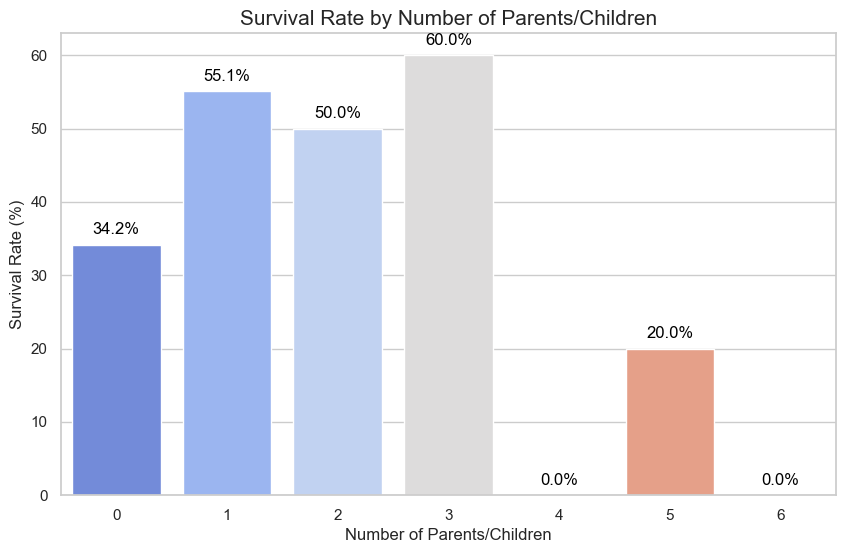

In [17]:
survival_rate = DS2.groupby('Parch')['Survived'].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='coolwarm')
plt.title('Survival Rate by Number of Parents/Children', fontsize=15)
plt.xlabel('Number of Parents/Children', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
for i, rate in enumerate(survival_rate):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center', va='bottom', fontsize=12, color='black')
plt.show()

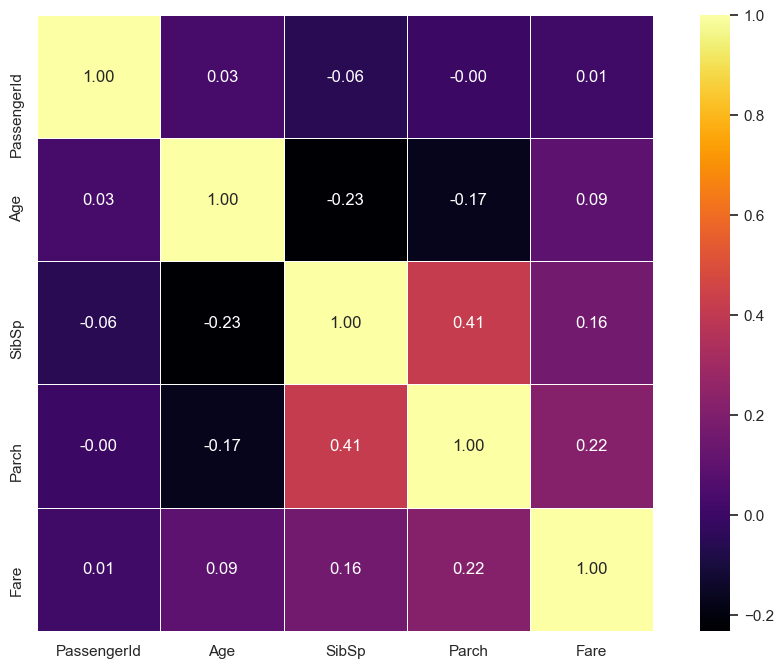

In [21]:
df = pd.DataFrame(DS2)
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True,  
            cmap='inferno',  
            linewidths=0.5, 
            fmt='.2f',
            square=True) 
plt.show()

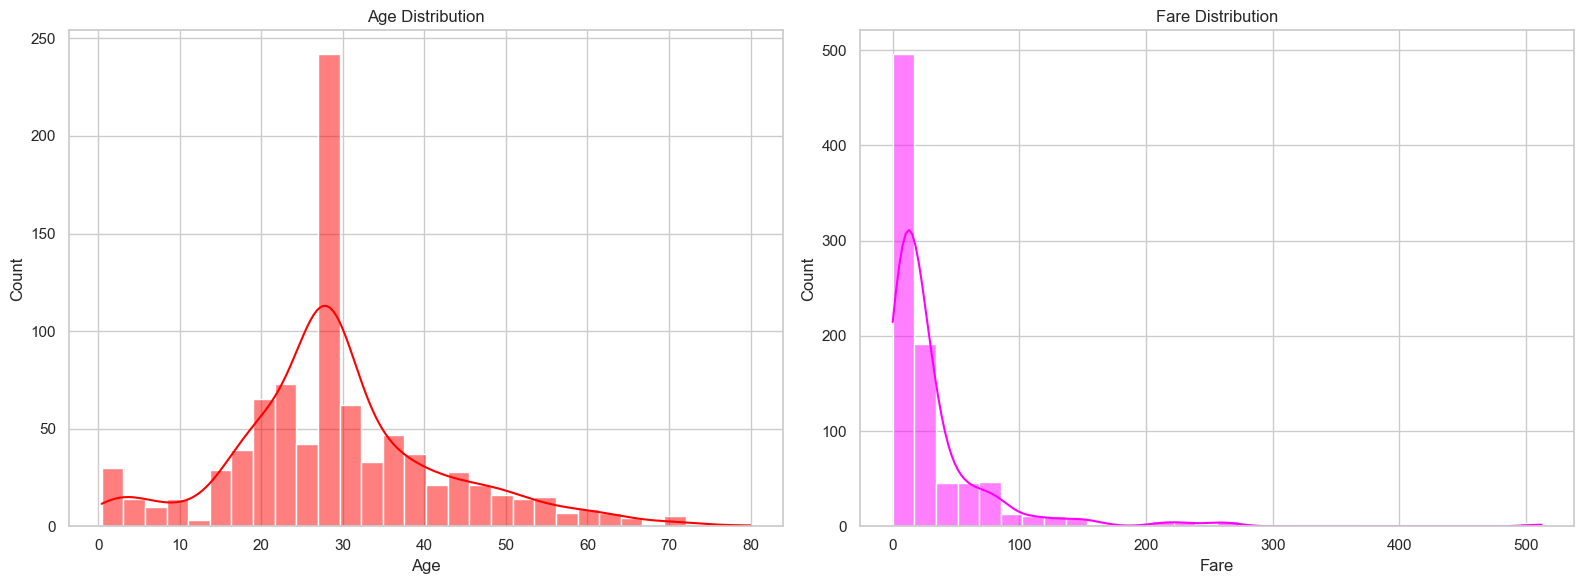

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
# Plot histogram for Age
sns.histplot(data=DS2, x='Age', kde=True, bins=30, color='red', ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot histogram for Fare
sns.histplot(data=DS2, x='Fare', kde=True, bins=30, color='magenta', ax=axes[1])
axes[1].set_title('Fare Distribution')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

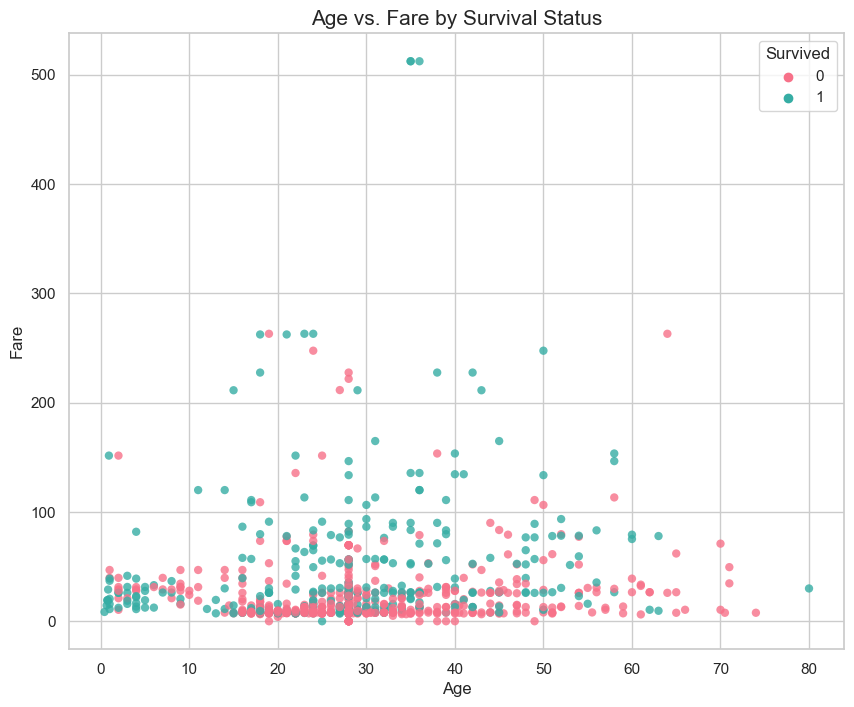

In [23]:
custom_palette = sns.color_palette("husl", 2)  
plt.figure(figsize=(10, 8))
sns.scatterplot(data=DS2, x='Age', y='Fare', hue='Survived', palette=custom_palette, alpha=0.8, edgecolor='none')
plt.title('Age vs. Fare by Survival Status', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.legend(title='Survived', fontsize=10)
plt.legend(title='Survived', loc='upper right')
plt.show()